In [19]:
import scipy as sp 
import scipy.stats as stats
import numpy as np
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import itertools



### Approximate Bayesian Computation

* We estimated the parameter distribution using rejection sampling
  * Sampling data from the proxy distribution and only retaining the samples that "look like" our data. 

* Approach: 
  * We used a generate model to generate data 
    * E.g., a binomial to simulate success (sign ups to a prototype website)
  * A criterion for determining whether the sample "looks like" our data or not. 
    * In real and complex situations, the acceptance criterion could be more flexible
      E.g.: working with continuous values
  * Record the parameter if the binomial sample equals the number of signups
 

### The Prior 

* A prior represents one's initial beliefs about possible models ("Situations").
 * It is not related to the data at hand (exists without your data)
* For instance, your belief may be that all the coins in circulation are fair, except for some minor variance inherent to the manufacturing process. 
  * Your prior over the coin's fairness could be represented in the graph below
  * The graph represent a beta distribution with params `a = b = 100` 


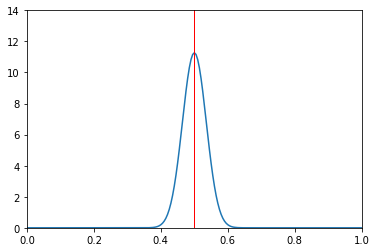

In [4]:
pyplot.figure(figsize=(6,4))
# We will see why we need to a use a beta later
x_axis = np.arange(0, 1.05, 0.005)
b_dist = stats.beta(100,100)
p_x = b_dist.pdf(x_axis)
pyplot.plot(x_axis, p_x)

pyplot.xlim(xmax=1) # adjust the max leaving min unchanged
pyplot.xlim(xmin=0) 
pyplot.ylim(ymin=0) 
pyplot.ylim(ymax=14) 

pyplot.axvline(x=.5, linewidth=1, color = 'r', )

###  The Prior - Cont'd

* You may believe that the coin can be equally biased to have any probability for heads

* Your belief about the coin could be represented with a uniform distribution $U(0,1)$, 
  which is also a Beta, $B(1,1)$.

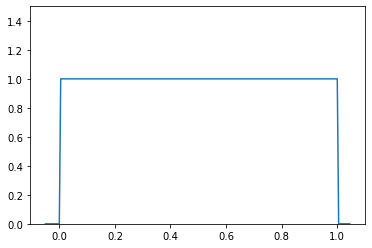

In [9]:
pyplot.figure(figsize=(6, 4))
# We will see why we need to a use a beta later
x_axis = np.arange(-.05, 1.05, 0.005)
b_dist = stats.beta(1,1)
p_x = b_dist.pdf(x_axis)
pyplot.plot(x_axis, p_x)
pyplot.ylim(ymax=1.5) # adjust the max leaving min unchanged
_ = pyplot.ylim(ymin=0) 


### The Beta Distribution

* We saw from the examples above that:
  1. The range of values a beta takes are contained within [0,1]
  2. The distribution has at most one single peak
  3. the peak's location is defined by two variable $a$ and $b$ that we passed the probability distribution constructor
    * `stats.beta(1,1)`
* The beta distribution is often used to represent outcomes between 0 and 1.
  * The value of a coin’s bias is a continuous real number between 0 and 1.
 

### The Beta Distribution - Exmaples

![](https://www.dropbox.com/s/94yyomu7e6hwinh/beta_examples.png?dl=1)

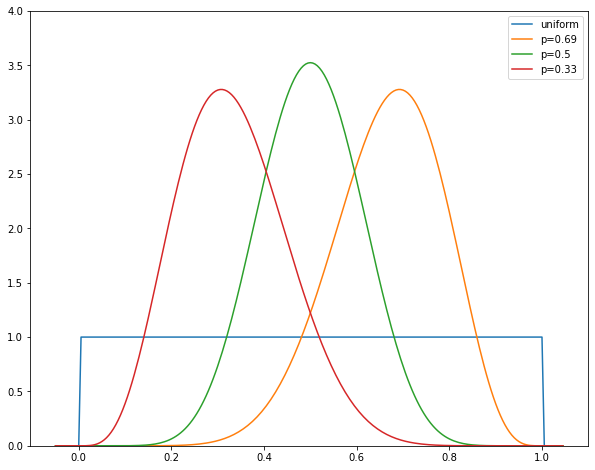

In [12]:
pyplot.figure(figsize=(10,8))

# We will see why we need to a use a beta later
x_axis = np.arange(-.05, 1.05, 0.005)

b_dist_1 = stats.beta(1,1)
pyplot.plot(x_axis, b_dist_1.pdf(x_axis), label="uniform")

b_dist_2 = stats.beta(10,5)
pyplot.plot(x_axis, b_dist_2.pdf(x_axis), label="p=0.69")

b_dist_3 = stats.beta(10,10)
pyplot.plot(x_axis, b_dist_3.pdf(x_axis), label="p=0.5")

b_dist_4 = stats.beta(5,10)
pyplot.plot(x_axis, b_dist_4.pdf(x_axis), label="p=0.33")

# pyplot.ylim(ymax=1.5) # adjust the max leaving min unchanged
pyplot.ylim(ymin=0) 

pyplot.ylim(ymax=4) 

# pyplot.axvline(x=.5, linewidth=1, color = 'r', )

_ = pyplot.legend()


### The Beta Distribution - Cont'd

* The spread of the distribution is also defined by the params $\alpha$ and $\beta$, such that:


  * Given $X\sim B(a,b)$

$$
var[X] = \frac{ab}{(a+ b)^2 (a+b+1)}
$$

* Therefore, when $\alpha$ is much larger than $\beta$ (or the opposite), var. is small

In [11]:
def varX(a,b):
    return (a * b) / ((a + b)**2 + (a + b +1))

a = np.arange(1.,1000., 10)
b = np.arange(1.,1000., 10)

# Doing the cartesian product, not multiplying the numbers
my_index = [x for x in itertools.product(a,b)] 


print(len(a), len(b))
print(len(my_index))

my_index[0:10]


100 100
10000


[(1.0, 1.0),
 (1.0, 11.0),
 (1.0, 21.0),
 (1.0, 31.0),
 (1.0, 41.0),
 (1.0, 51.0),
 (1.0, 61.0),
 (1.0, 71.0),
 (1.0, 81.0),
 (1.0, 91.0)]

In [24]:
varDF = pd.DataFrame({"a":[x[0] for x in my_index], "b":[x[1] for x in my_index]}, index= my_index)
varDF["varX"] = varX(varDF['a'], varDF['b'])
varDF.head()

,a,b,varX
"(1.0, 1.0)",1.0,1.0,0.142857
"(1.0, 11.0)",1.0,11.0,0.070064
"(1.0, 21.0)",1.0,21.0,0.041420
"(1.0, 31.0)",1.0,31.0,0.029328
"(1.0, 41.0)",1.0,41.0,0.022690


/var/folders/5l/gk6s2xx10qs0mkg4_9_vyp3h0000gn/T/ipykernel_15724/3132132171.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


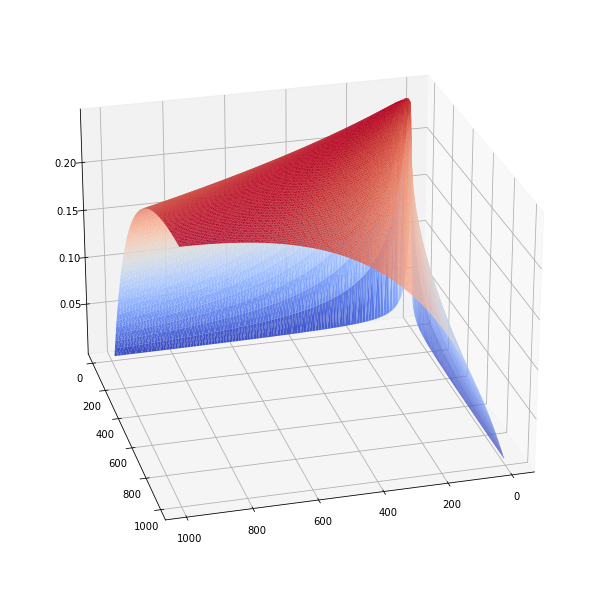

In [25]:
fig = pyplot.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.view_init(25,75)
_ = ax.plot_trisurf(varDF['a'], varDF['b'], varDF['varX'], cmap=cm.coolwarm , linewidth=0.5)



### Disadvantages of Approximate Bayesian Computation 

- Here we used exact matching, how do you determine which sample is similar to our data.

- Rejection rate will be intolerably high in high-dimensional data. 
 -  Acceptance rate will be close to 0. Therefore, we most likely won't generate new samples in a reasonable time.
 
If ABC is __approximate__, what is the alternative? 
- The alternative is standard Bayesian computation, or just Bayesian computation, and it would consist in not discarding the samples but to assign probabilities to these samples. If a sample is more likely then, we reward it, and if it more uncommon then we penalize it. 
    - We can do that using the likelihood.
* A very introductory and free book is [Probabilistic Programming and Bayesian Methods for Hackers](https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)


### Example Application: An Ideal Dating Venue?

* The "single" version of you is at large party and you meet 7 couples and a person who is single.

* You estimate that there are around 100 people in the room but you are unsure of the exact number. 

* What is the proportion of singles at the party? 

* We can estimate a solution using Approximate Bayesian Computation.



### Example Application -- Cont'd

* Our data is 7 pairs and 1 single people. 
* However, we are not sure of the number of guests at the party
 * The results depend critically on that paramter.

* We need two priors here: 
    1. Distribution of the total number of guests 
      * Our prior belief was that there were 100 guests
    2 The distribution of the fraction of singles amongst all the guests
      * Our prior can be informed by the observed data 



### The negative binomial distribution

* The _negative_ _binomial_ ( $NB$ ) distribution is the distribution of the number of trials that are required before the $r^{th}$ success.

* This is not to be confused with the Binomial, where the random variable is the number of successes in a fixed number of trials.

* The $pmf$ for the negative binomial can be easily derived from the binomial as:
$$    
    p(X=x) = \binom{x-1}{r-1}p^r(1-p)^{x-r}
$$



<Container object of 40 artists>

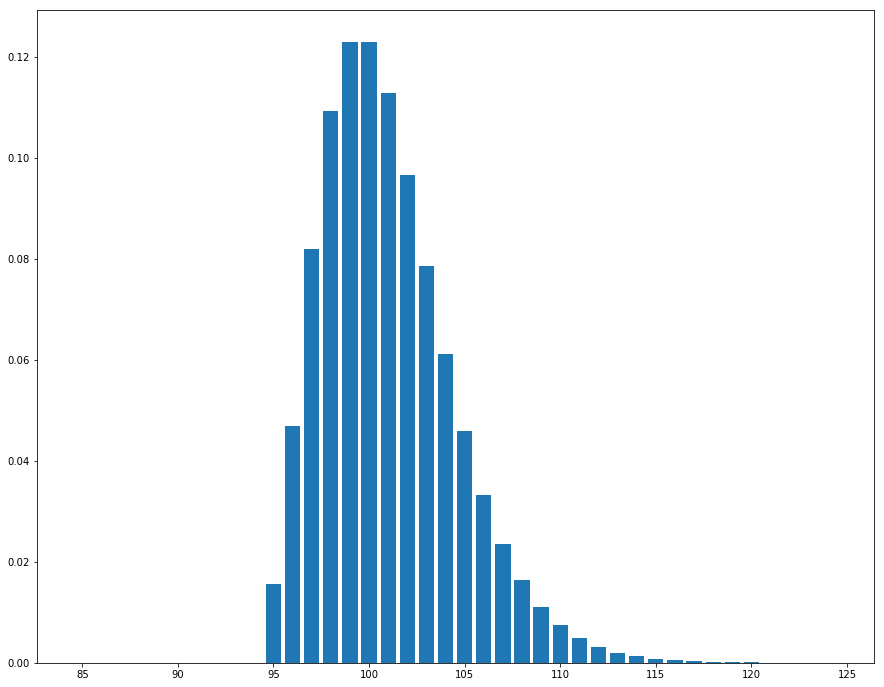

In [6]:
fig = pyplot.figure(figsize=(15,12))
x_axis = np.arange(85, 125, 1)
# using the temr RV to indicate the the variable is a random variable
nbGuestsRV = stats.nbinom(6, 0.5, loc=95) 

pyplot.bar(x_axis, nbGuestsRV.pmf(x_axis))


The proportion of singles at the party can be represented using a beta distribution (a fraction between 0 and 1). Your belief is that are more married couples in Hawaii than singles with a proportion of 3 to 1, but you are not so confident about this belief (you allow for a large variance).

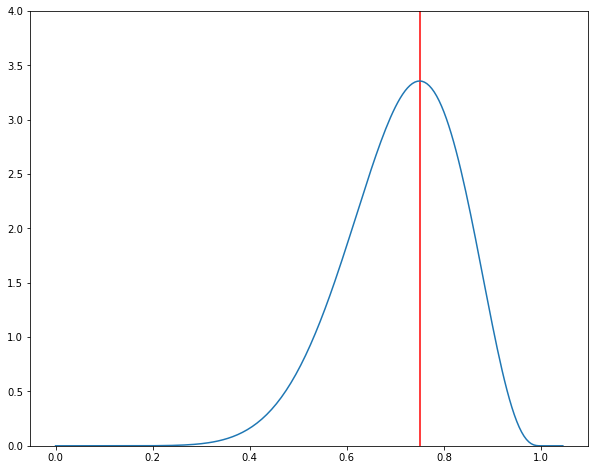

In [3]:
pyplot.figure(figsize=(10,8))
x_axis = np.arange(0, 1.05, 0.005)

# using the temr RV to indicate the the variable is a random variable
proportionSinglesRV = stats.beta(10,4) 
pyplot.axvline(x=0.75, color='r')

pyplot.ylim(ymin=0)
pyplot.ylim(ymax=4)

pyplot.plot(x_axis, proportionSinglesRV.pdf(x_axis))



Now, we can define the generative model. In other words, how can we combine both priors to generate a random sample for the couples and singles at the party.

1. We first generate a random sample for the number of people at the party
2. We then generate a portion of those people that are couples

For instance:


In [31]:
nbGuests = nbGuestsRV.rvs(1)
propCouples = proportionSinglesRV.rvs(1)
nbCouples = np.floor((nbGuests * propCouples)  / 2.)
nbSingles = nbGuests - (nbCouples * 2)

print "Total number of guests is %s, prop of couples is %s nbCouples is %s and nbSingles is %s" \
    % (nbGuests, propCouples, nbCouples, nbSingles)

Total number of guests is [98], prop of couples is [ 0.55592643] nbCouples is [ 27.] and nbSingles is [ 44.]


Since we met only 15 people at the party (7 couples and 1 single person), we need to sample as many individuals form our distribution. We consider that we met people in randomly, independent way.


In [22]:
random_guests_pop = [x for x in range(nbCouples)]  +  [x for x in range(nbCouples)] + [x for x in range(nbSingles)]

In [43]:
random_sample = np.random.choice([0,1], 15, p=[propCouples[0], 1-propCouples[0]], )

print random_sample
print "number of singles is %s" % sum(random_sample)
print "number of indivuslas in pairs is %s" % (15 - sum(random_sample))

[0 1 0 0 0 1 1 1 0 0 1 1 1 1 0]
number of singles is 8
number of indivuslais in pairs is 7


Now all we must do is repeat this process several times, and only retain the parameters that generate data that confirms our observations, i.e. 7 couples and 1 single.

In [26]:
totalGuestsSamples = []
propCouplesSamples = []

for i in range(10):
    nbGuests = nbGuestsRV.rvs(1)
    propCouples = proportionSinglesRV.rvs(1)
    nbCouples = np.floor((nbGuests * propCouples)  / 2.)
    nbSingles = nbGuests - (nbCouples * 2)

    print "Total number of guests is %s, prop of couples is %s nbCouples is %s and nbSingles is %s" \
        % (nbGuests, propCouples, nbCouples, nbSingles)
        
    random_sample = np.random.choice([0,1], 15, p=[propCouples[0], 1-propCouples[0]], )

    print random_sample
    print "number of singles is %s" % sum(random_sample)
    print "number of couples is %s" % (15 - sum(random_sample))
    
    if sum(random_sample) == 1:
        totalGuestsSamples.append(nbGuests[0])
        propCouplesSamples.append(propCouples[0])
    
    print "\n\n\n"

Total number of guests is [101], prop of couples is [ 0.64453624] nbCouples is [ 32.] and nbSingles is [ 37.]
[1 0 1 0 1 0 1 0 1 1 0 0 0 0 0]
number of singles is 6
number of couples is 9




Total number of guests is [98], prop of couples is [ 0.92689554] nbCouples is [ 45.] and nbSingles is [ 8.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
number of singles is 0
number of couples is 15




Total number of guests is [100], prop of couples is [ 0.51817875] nbCouples is [ 25.] and nbSingles is [ 50.]
[0 0 0 1 0 1 0 0 0 1 0 0 0 0 1]
number of singles is 4
number of couples is 11




Total number of guests is [96], prop of couples is [ 0.73735983] nbCouples is [ 35.] and nbSingles is [ 26.]
[0 1 1 1 1 1 0 0 0 1 0 0 0 0 1]
number of singles is 7
number of couples is 8




Total number of guests is [103], prop of couples is [ 0.76439957] nbCouples is [ 39.] and nbSingles is [ 25.]
[0 0 1 1 0 0 0 0 1 0 0 1 0 1 1]
number of singles is 6
number of couples is 9




Total number of guests is [98], prop of c

In [27]:
print totalGuestsSamples
print propCouplesSamples


[]
[]


Notice that we need to repeat the process a very large number of times to have enough samples that represent our observations. We try with 100,000 iterations. This may take few minutes, depending on your machine CPU capacity and usage.

In [28]:
totalGuestsSamples = []
propCouplesSamples = []

iterationNumber = 0 
for i in range(100000):
    nbGuests = nbGuestsRV.rvs(1)
    propCouples = proportionSinglesRV.rvs(1)
    nbCouples = np.floor((nbGuests * propCouples)  / 2.)
    nbSingles = nbGuests - (nbCouples * 2)

        
    random_sample = np.random.choice([0,1], 15, p=[propCouples[0], 1-propCouples[0]], )


    if sum(random_sample) == 1:
        totalGuestsSamples.append(nbGuests[0])
        propCouplesSamples.append(propCouples[0])
    
    if (iterationNumber % 1000) == 0:
        print iterationNumber,
    iterationNumber+=1
print "Done"

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000 97000 98000 99000 Done


How many samples matches our observations?

In [29]:
print "In a 100,000 iterations, %s samples matches our data" % len(totalGuestsSamples)

In a 100,000 iterations, 8714 samples matches our data


What does the distribution of guests looks Like?

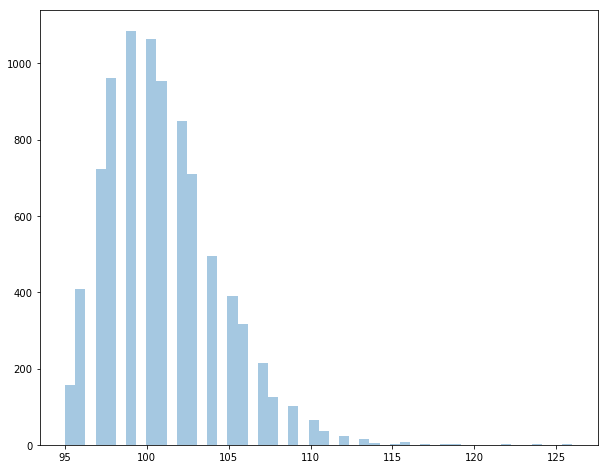

In [30]:
pyplot.figure(figsize=(10,8))
sns.distplot(totalGuestsSamples, kde=False)

What does the proportion of couples look like?

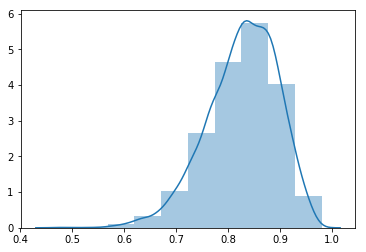

In [31]:
sns.distplot(propCouplesSamples, bins=10)

### Conclusions

Do the results match our initial prior?

Why do we need a prior on the data?
- it determines which hypothesis are reasonable which are not, i.e., it controls the likelihood. More on this when we talk about the standard Bayesian Method.
